In [ ]:
# Dataset Link - https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:09<00:00, 198MB/s]
100% 1.06G/1.06G [00:09<00:00, 121MB/s]


In [3]:
import zipfile

zip_data = zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_data.extractall('/content/')
zip_data.close()

# **Import Essential Libraries**

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [5]:
import matplotlib.pyplot as plt
import cv2

In [6]:
img = cv2.imread('/content/test/cats/cat.10057.jpg')
img

array([[[136, 165, 169],
        [136, 165, 169],
        [136, 165, 169],
        ...,
        [251, 251, 251],
        [251, 251, 251],
        [251, 251, 251]],

       [[136, 165, 169],
        [136, 165, 169],
        [136, 165, 169],
        ...,
        [251, 251, 251],
        [251, 251, 251],
        [251, 251, 251]],

       [[135, 164, 168],
        [135, 164, 168],
        [135, 164, 168],
        ...,
        [251, 251, 251],
        [251, 251, 251],
        [251, 251, 251]],

       ...,

       [[103, 124, 126],
        [103, 124, 126],
        [103, 124, 126],
        ...,
        [198, 226, 227],
        [198, 226, 227],
        [198, 226, 227]],

       [[103, 124, 126],
        [103, 124, 126],
        [103, 124, 126],
        ...,
        [198, 226, 227],
        [198, 226, 227],
        [198, 226, 227]],

       [[104, 125, 127],
        [104, 125, 127],
        [104, 125, 127],
        ...,
        [198, 226, 227],
        [198, 226, 227],
        [198, 226, 227]]

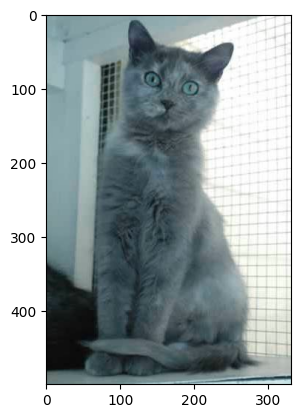

In [7]:
plt.imshow(img)

In [8]:
img.shape

(500, 331, 3)

In [9]:
# Generator

train_ds = tf.keras.utils.image_dataset_from_directory(

    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)

)

test_ds = tf.keras.utils.image_dataset_from_directory(

    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)

)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [10]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [10]:
print(f'Number of Batches: {20000//32}')

Number of Batches: 625


In [12]:
0/255, 255/255

(0.0, 1.0)

In [11]:
# Normalization

def scale_down_px(image, label):

  image = tf.cast(image/255, tf.float32)

  return image, label

In [12]:
133/255

0.5215686274509804

In [13]:
train_ds = train_ds.map(scale_down_px)
test_ds = test_ds.map(scale_down_px)

# Create a CNN model or Architecture

In [14]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape= (256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [16]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

In [17]:
history = model.fit(train_ds, validation_data=test_ds, epochs=10)

Epoch 1/10
625/625 [==============================] - 72s 95ms/step - loss: 0.5995 - accuracy: 0.6651 - val_loss: 0.4858 - val_accuracy: 0.7648
Epoch 2/10
625/625 [==============================] - 71s 114ms/step - loss: 0.4656 - accuracy: 0.7757 - val_loss: 0.4461 - val_accuracy: 0.7974
Epoch 3/10
625/625 [==============================] - 59s 94ms/step - loss: 0.3632 - accuracy: 0.8374 - val_loss: 0.4857 - val_accuracy: 0.8034
Epoch 4/10
625/625 [==============================] - 61s 98ms/step - loss: 0.2437 - accuracy: 0.8984 - val_loss: 0.6150 - val_accuracy: 0.7778
Epoch 5/10
625/625 [==============================] - 58s 92ms/step - loss: 0.1307 - accuracy: 0.9486 - val_loss: 0.8926 - val_accuracy: 0.7750
Epoch 6/10
625/625 [==============================] - 54s 85ms/step - loss: 0.0811 - accuracy: 0.9712 - val_loss: 1.0568 - val_accuracy: 0.7842
Epoch 7/10
625/625 [==============================] - 55s 88ms/step - loss: 0.0488 - accuracy: 0.9838 - val_loss: 1.2770 - val_accuracy

# **Training/Validation Accuracy Graph**

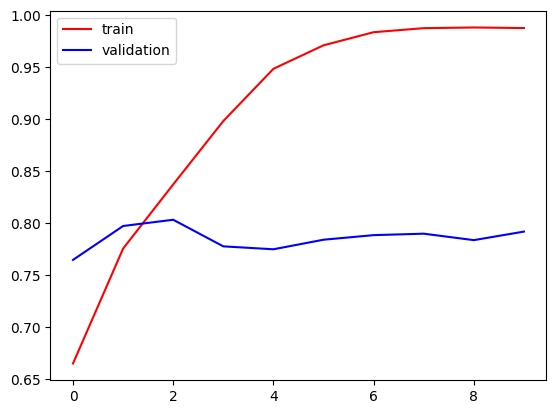

In [18]:
plt.plot(history.history['accuracy'], color='r', label='train')
plt.plot(history.history['val_accuracy'], color='b', label='validation')
plt.legend()
plt.show()

# **Training/Validation Loss Graph**

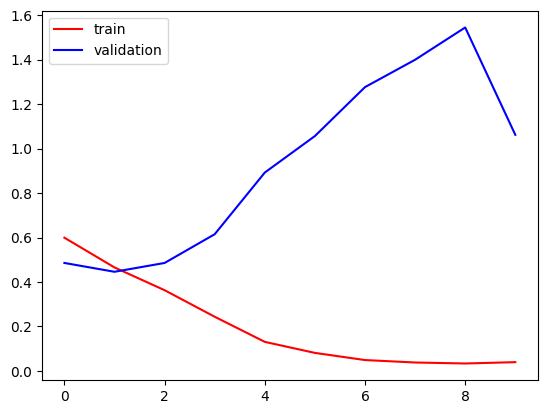

In [19]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

# Ways to improve model performance and to prevent overfitting

- Add more data
- Data Augmentation
- L1/L2 Regularization
- Batch Normalization
- Dropout Layer

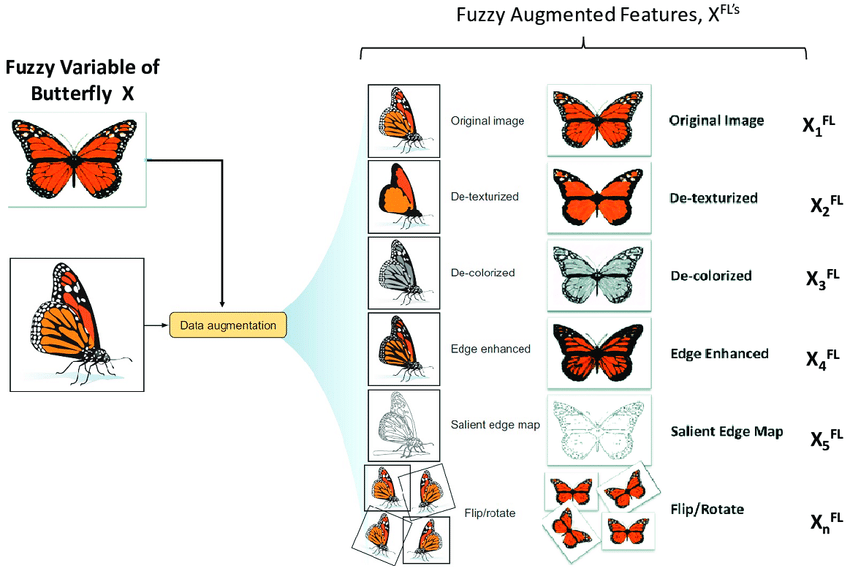

In [20]:
from keras.layers import BatchNormalization, Dropout

In [21]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape= (256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [23]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

In [24]:
history = model.fit(train_ds, validation_data=test_ds, epochs=10)

Epoch 1/10
625/625 [==============================] - 75s 115ms/step - loss: 1.1998 - accuracy: 0.6051 - val_loss: 0.6081 - val_accuracy: 0.6728
Epoch 2/10
625/625 [==============================] - 69s 110ms/step - loss: 0.5552 - accuracy: 0.7237 - val_loss: 1.1407 - val_accuracy: 0.5178
Epoch 3/10
625/625 [==============================] - 75s 119ms/step - loss: 0.4834 - accuracy: 0.7718 - val_loss: 0.4895 - val_accuracy: 0.7614
Epoch 4/10
625/625 [==============================] - 75s 119ms/step - loss: 0.4170 - accuracy: 0.8113 - val_loss: 0.4391 - val_accuracy: 0.7968
Epoch 5/10
625/625 [==============================] - 70s 111ms/step - loss: 0.3611 - accuracy: 0.8420 - val_loss: 0.4503 - val_accuracy: 0.7970
Epoch 6/10
625/625 [==============================] - 76s 121ms/step - loss: 0.2910 - accuracy: 0.8786 - val_loss: 0.4560 - val_accuracy: 0.8022
Epoch 7/10
625/625 [==============================] - 66s 105ms/step - loss: 0.2161 - accuracy: 0.9117 - val_loss: 0.6030 - val_ac

# **Training/Validation Accuracy Graph**

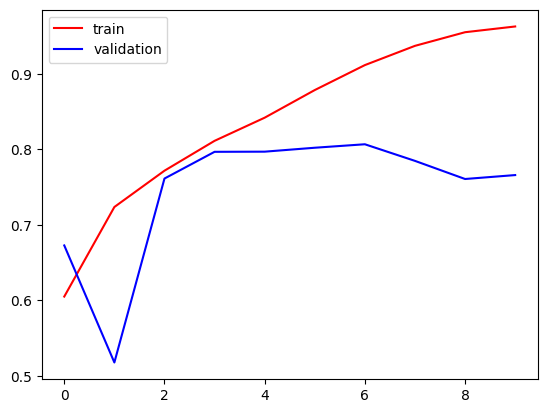

In [25]:
plt.plot(history.history['accuracy'], color='r', label='train')
plt.plot(history.history['val_accuracy'], color='b', label='validation')
plt.legend()
plt.show()

# **Training/Validation Loss Graph**

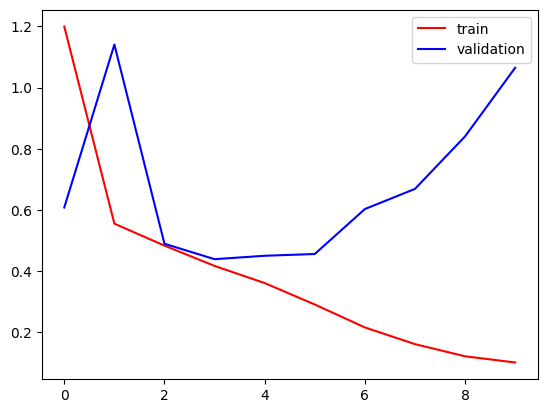

In [26]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

# **Testing the Model**

In [83]:
test_img = cv2.imread('/content/dog2.jpeg')

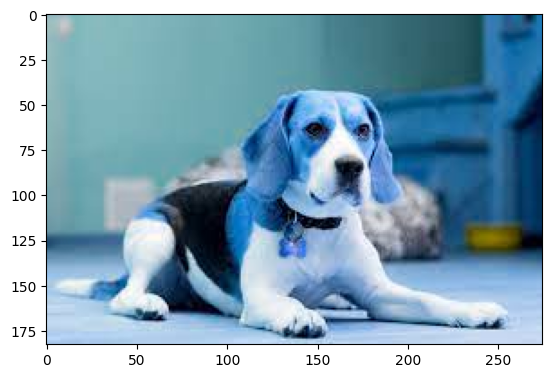

In [84]:
plt.imshow(test_img)

In [85]:
test_img.shape

(183, 275, 3)

In [86]:
test_img = cv2.resize(test_img, (256,256))

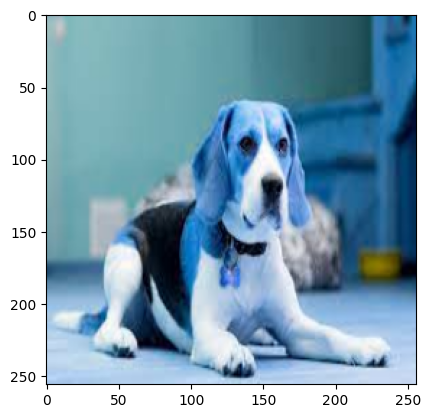

In [87]:
plt.imshow(test_img)

In [88]:
test_img.shape


(256, 256, 3)

In [89]:
test_input = test_img.reshape(1, 256, 256, 3)

In [90]:
model.predict(test_input)

1/1 [==============================] - 0s 31ms/step


array([[0.]], dtype=float32)

In [91]:
model.predict(test_input)[0]

1/1 [==============================] - 0s 25ms/step


array([0.], dtype=float32)

In [92]:
model.predict(test_input)[0][0]

1/1 [==============================] - 0s 25ms/step


0.0

In [93]:
output = model.predict(test_input)[0][0]
print(f'Output is: {output} \n')

if output >= 0.5:
  print('This is a Dog')
else:
  print('This is a Cat')

1/1 [==============================] - 0s 19ms/step
Output is: 0.0 

This is a Cat
